In [12]:
%load_ext autoreload
%autoreload 2


from diffusion_opt.experiment_aggregation import Experiment, ExperimentSummary



# set up matplotlib

import matplotlib.pyplot as plt
from tueplots import bundles
from tueplots import figsizes, fontsizes

plt.rcParams.update(bundles.icml2022())

sizes = plt.rcParams.copy()

figsize_hhalf = sizes['figure.figsize'][0] / 2, sizes['figure.figsize'][1]
new_figsize = sizes['figure.figsize'][0], sizes['figure.figsize'][1] /2.0
sizes = figsizes.neurips2023(ncols=1)
new_figsize = sizes['figure.figsize'][0], sizes['figure.figsize'][1] /2.0
figsize_full = sizes['figure.figsize'][0], sizes['figure.figsize'][1]
figsize_75 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.75
figsize_25 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.25
figsize_40 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.4
figsize_30 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.3
figsize_70 = sizes['figure.figsize'][0], sizes['figure.figsize'][1] * 0.7


# COLORS = "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"

COLORS = "#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"


COLORS_FLOATING_POINT = [
    (0.368,0.507,0.71), # blue
    (0.881,0.611,0.142), # orange
    (.56,0.692,0.195), # green
    (0.923,0.386,0.209), # red
    (0.528,0.471,0.701), # purple
    (0.772,0.432,0.102), # brown
    (0.364,0.619,0.782) # cyan
]

# AL group color scheme
COLORS = []
for (r,g,b) in COLORS_FLOATING_POINT:
    # print("#%02x%02x%02x" % (int(r*255), int(g*255), int(b*255)))
    COLORS.append("#%02x%02x%02x" % (int(r*255), int(g*255), int(b*255)))





The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# data loading

path = '/is/rg/al/Data/solo12_data/blm_more_alpha_l0'
experiments = Experiment.extract_experiments([path], load_tensorboard=False, load_h5=True)


100%|██████████| 324/324 [00:38<00:00,  8.40it/s]


In [13]:
summary = ExperimentSummary(experiments, exclude_params=['solo_legged_gym.env_cfg.seed'])

In [33]:
for k in summary.experiments[0].values.keys():
    if 'avg_nearest' in k:
        print(k)

scalar/main/Feature/avg_nearest_dist
scalar/main/Feature/avg_nearest_dist_per_step


In [47]:
time_statistics_feature[(0.3, 0.3, 0.3, 1.0)].keys()

dict_keys(['mu', 'var'])

In [63]:
idx = (0.3, None, None, None)

time_statistics_feature = summary.time_statistics('scalar/main/Feature/avg_nearest_dist_per_step', [idx])
time_statistics_return = summary.time_statistics('scalar/main/Constraint/avg_ext_values_rew0_skill1', [idx])


import numpy as np

def extract_mu_std(ts):
    """Returns last timestep."""
    return np.array([t['mu'][-1] for t in ts]),np.array([t['std'][-1] for t in ts])

##### change this with data #######

x = np.array([time_statistics_feature[k]['mu'][-1] for k in time_statistics_feature])
y = np.array([time_statistics_return[k]['mu'][-1] for k in time_statistics_return])
x_err = np.sqrt(np.array([time_statistics_feature[k]['var'][-1] for k in time_statistics_feature]))
y_err = np.sqrt(np.array([time_statistics_return[k]['var'][-1] for k in time_statistics_return]))

a1 = np.array([k[0] for k in time_statistics_feature.keys()])
a2 = np.array([k[1] for k in time_statistics_feature.keys()])
a3 = np.array([k[2] for k in time_statistics_feature.keys()])
l0_values = np.array([k[3] for k in time_statistics_feature.keys()])
cmap_l0 = {
    1.0: COLORS[0],
    2.0: COLORS[1],
    3.0: COLORS[2],
    4.0: COLORS[3]
}
l0_colors = [cmap_l0[l0] for l0 in l0_values]

####################################


Experiments Int64Index([4, 10, 242], dtype='int64') has 3 runs
Experiments Int64Index([40, 159, 244], dtype='int64') has 3 runs
Experiments Int64Index([13, 19, 184], dtype='int64') has 3 runs
Experiments Int64Index([135, 187, 266], dtype='int64') has 3 runs
Experiments Int64Index([151, 312, 315], dtype='int64') has 3 runs
Experiments Int64Index([145, 158, 241], dtype='int64') has 3 runs
Experiments Int64Index([143, 164, 213], dtype='int64') has 3 runs
Experiments Int64Index([161, 257, 268], dtype='int64') has 3 runs
Experiments Int64Index([171, 193, 284], dtype='int64') has 3 runs
Experiments Int64Index([33, 79, 247], dtype='int64') has 3 runs
Experiments Int64Index([103, 212, 297], dtype='int64') has 3 runs
Experiments Int64Index([67, 238, 252], dtype='int64') has 3 runs
Experiments Int64Index([4, 10, 242], dtype='int64') has 3 runs
Experiments Int64Index([40, 159, 244], dtype='int64') has 3 runs
Experiments Int64Index([13, 19, 184], dtype='int64') has 3 runs
Experiments Int64Index([1

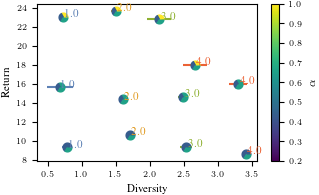

In [69]:

# data
# define indexes that you want to plot here
idx = (None, 0.3, 0.6, None)

time_statistics_feature = summary.time_statistics('scalar/main/Feature/avg_nearest_dist_per_step', [idx])
time_statistics_return = summary.time_statistics('scalar/main/Constraint/avg_ext_values_rew0_skill1', [idx])


import numpy as np

def extract_mu_std(ts):
    """Returns last timestep."""
    return np.array([t['mu'][-1] for t in ts]),np.array([t['std'][-1] for t in ts])

##### change this with data #######

x = np.array([time_statistics_feature[k]['mu'][-1] for k in time_statistics_feature])
y = np.array([time_statistics_return[k]['mu'][-1] for k in time_statistics_return])
x_err = np.sqrt(np.array([time_statistics_feature[k]['var'][-1] for k in time_statistics_feature]))
y_err = np.sqrt(np.array([time_statistics_return[k]['var'][-1] for k in time_statistics_return]))

a1 = np.array([k[0] for k in time_statistics_feature.keys()])
a2 = np.array([k[1] for k in time_statistics_feature.keys()])
a3 = np.array([k[2] for k in time_statistics_feature.keys()])
l0_values = np.array([k[3] for k in time_statistics_feature.keys()])
cmap_l0 = {
    1.0: COLORS[0],
    2.0: COLORS[1],
    3.0: COLORS[2],
    4.0: COLORS[3]
}
l0_colors = [cmap_l0[l0] for l0 in l0_values]

####################################




# random scatter plot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import itertools




def scatter_pie_markers(x,y, c1, c2, c3, size=40, ax=None):

    # first define the ratios
    r1 = 0.33       # 20%
    r2 = r1 + 0.33  # 40%

    if ax is None:
        ax = plt.gca()

    # calculate the points of the first pie marker
    #
    # these are just the origin (0,0) +
    # some points on a circle cos,sin
    x_ = [0] + np.cos(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
    y_ = [0] + np.sin(np.linspace(0, 2 * np.pi * r1, 10)).tolist()
    xy1 = np.column_stack([x_, y_])
    s1 = np.abs(xy1).max()

    x_ = [0] + np.cos(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
    y_ = [0] + np.sin(np.linspace(2 * np.pi * r1, 2 * np.pi * r2, 10)).tolist()
    xy2 = np.column_stack([x_, y_])
    s2 = np.abs(xy2).max()

    x_ = [0] + np.cos(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
    y_ = [0] + np.sin(np.linspace(2 * np.pi * r2, 2 * np.pi, 10)).tolist()
    xy3 = np.column_stack([x_, y_])
    s3 = np.abs(xy3).max()

    ax.scatter(x, y, marker=xy1,
            s=s1 ** 2 * size, facecolor=c1)
    ax.scatter(x, y, marker=xy2,
            s=s2 ** 2 * size, facecolor=c2)
    return ax.scatter(x, y, marker=xy3,
            s=s3 ** 2 * size, facecolor=c3)





fig, ax = plt.subplots()


##### change this with data #######

# x,y = np.random.rand(20), np.random.rand(20)
# y_err = np.random.rand(20) * 0.1
# x_err = np.random.rand(20) * 0.1
# a1 = np.random.rand(20)
# a2 = np.random.rand(20)
# a3 = np.random.rand(20)

# l0_colors = np.random.randint(3, size=20)
# l0_values = [1.0, 2.0, 4.0]
# l0_values = np.array([l0_values[i] for i in l0_colors])
# l0_colors = np.array([COLORS[i] for i in l0_colors])

####################################



c = COLORS[0]

cmap = matplotlib.colormaps['viridis'].resampled(8)



for x_, y_, y_err_, x_err_, a1_, a2_, a3_, l0, l0_color in zip(x.reshape(-1, 1),y.reshape(-1,1),y_err.reshape(-1,1),x_err.reshape(-1,1), a1, a2, a3, l0_values, l0_colors):

    plt.errorbar(x_, y_, xerr=x_err_, fmt='o', markersize=0.0, zorder=-1, c=l0_color)
    im = scatter_pie_markers(x_,y_, cmap(a1_), cmap(a2_), cmap(a3_), ax=ax)


    ax.annotate(f'{l0}', (x_+0.02,  y_+0.02), color=l0_color)




# plot heatmap of the data
ax.set_ylabel("Return")
ax.set_xlabel("Diversity")


norm = matplotlib.colors.Normalize(vmin=0.2, vmax=1.0)
fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax, orientation="vertical", label="$\\alpha$")

import os
fig.savefig(os.path.expanduser('~/Figures/icra2023/vdw_rainbow_r0.pdf'), bbox_inches='tight')







In [56]:
len(y_err)

108